# Install Necessary packages


In [28]:
!pip install transformers

# Importing Libraries

In [30]:
from transformers import BertModel, AutoTokenizer
from scipy.spatial.distance import cosine

## Instantiate Model and tokenizer

In [31]:
model_name = 'bert-base-cased'
model = BertModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

## Input Text

In [33]:
text = "Tokenize this sentence."
encoded_inputs = tokenizer(text, return_tensors='pt')

## Peeking into tokenizer output
- The length of input ids is 8

In [34]:
tokenizer(text)

{'input_ids': [101, 1706, 6378, 3708, 1142, 5650, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [35]:
for i in tokenizer(text)['input_ids']:
  print(i, tokenizer.decode(i))

101 [CLS]
1706 To
6378 ##ken
3708 ##ize
1142 this
5650 sentence
119 .
102 [SEP]


In [36]:
encoded_inputs

{'input_ids': tensor([[ 101, 1706, 6378, 3708, 1142, 5650,  119,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

### we cannot directly pass the tokenized input without converting them to tensor

In [37]:
op = model(tokenizer(text))

TypeError: ignored

## The output contains last_hidden_state and pooler

In [38]:
output_tensors = model(**encoded_inputs)
len(output_tensors)

2

In [39]:
output_tensors

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.4213, -0.2407,  0.1908,  ..., -0.1027,  0.5183, -0.0046],
         [ 0.7725, -0.3789,  0.5518,  ..., -0.0847,  0.5502, -0.2157],
         [ 0.1887,  0.5992, -0.2414,  ...,  0.1579, -0.3802,  0.3046],
         ...,
         [ 0.1322,  0.4504,  0.5448,  ...,  0.3998,  0.3763,  0.2778],
         [ 0.3326, -0.0751,  0.3363,  ...,  0.2181,  0.6169,  0.1773],
         [ 0.1542, -0.3884, -0.2581,  ..., -0.0109,  1.1220, -0.2223]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-7.4529e-01,  5.4090e-01,  9.9995e-01, -9.9483e-01,  9.7282e-01,
          7.8383e-01,  9.8817e-01, -9.7496e-01, -9.7366e-01, -7.3730e-01,
          9.8630e-01,  9.9891e-01, -9.9493e-01, -9.9988e-01,  5.1780e-01,
         -9.7315e-01,  9.9459e-01, -6.4008e-01, -9.9998e-01, -4.0078e-01,
         -6.1211e-01, -9.9990e-01,  1.7728e-01,  9.4825e-01,  9.8260e-01,
          1.4567e-01,  9.9090e-01,  9.9997e-01,  8.9886e-01, -1.543

In [40]:
output_tensors[0].shape, output_tensors[1].shape

(torch.Size([1, 8, 768]), torch.Size([1, 768]))

In [41]:
output_tensors[0][0].shape

torch.Size([8, 768])

In [43]:
last_hidden_state = output_tensors.last_hidden_state
pooler_output = output_tensors.pooler_output

### The 8, 768 shows the 8 tokenized words in the context of 768 embedding dimension (vector space or direction).

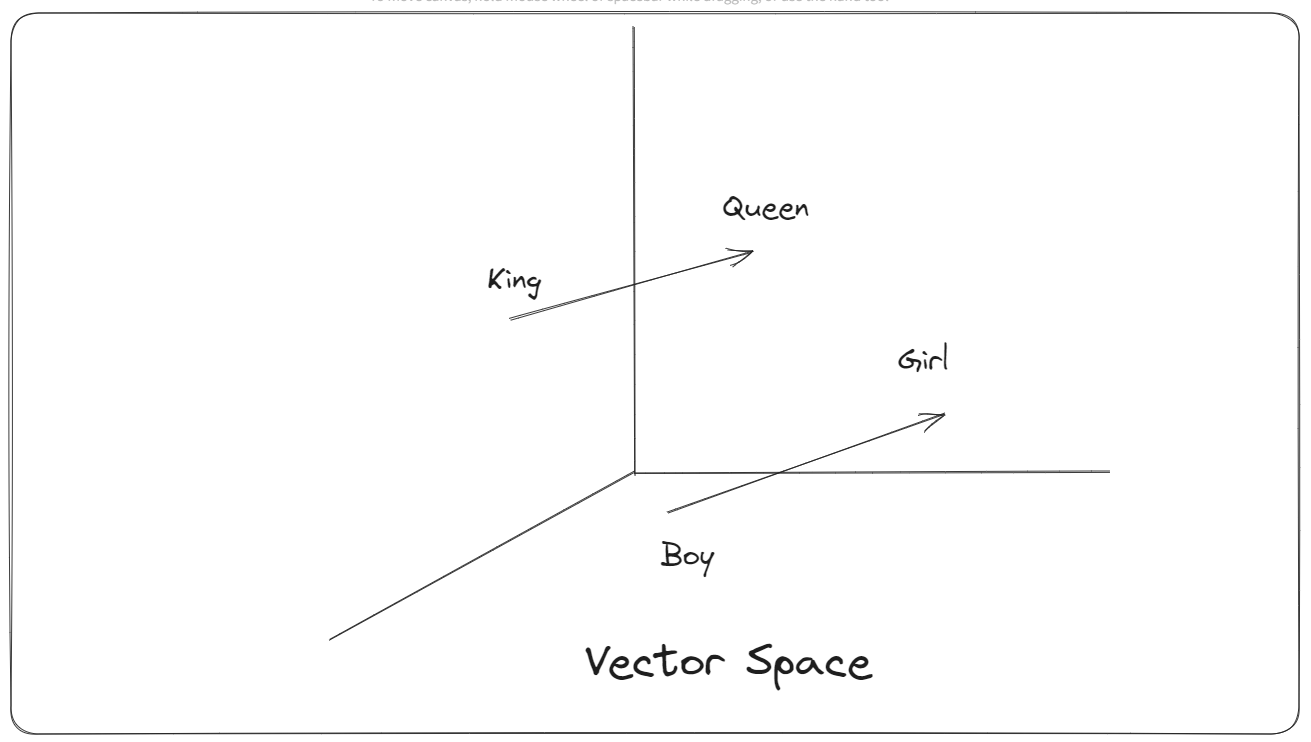

In [44]:
last_hidden_state.shape, pooler_output.shape

(torch.Size([1, 8, 768]), torch.Size([1, 768]))

In [45]:
last_hidden_state

tensor([[[ 0.4213, -0.2407,  0.1908,  ..., -0.1027,  0.5183, -0.0046],
         [ 0.7725, -0.3789,  0.5518,  ..., -0.0847,  0.5502, -0.2157],
         [ 0.1887,  0.5992, -0.2414,  ...,  0.1579, -0.3802,  0.3046],
         ...,
         [ 0.1322,  0.4504,  0.5448,  ...,  0.3998,  0.3763,  0.2778],
         [ 0.3326, -0.0751,  0.3363,  ...,  0.2181,  0.6169,  0.1773],
         [ 0.1542, -0.3884, -0.2581,  ..., -0.0109,  1.1220, -0.2223]]],
       grad_fn=<NativeLayerNormBackward0>)

In [46]:
pooler_output

tensor([[-7.4529e-01,  5.4090e-01,  9.9995e-01, -9.9483e-01,  9.7282e-01,
          7.8383e-01,  9.8817e-01, -9.7496e-01, -9.7366e-01, -7.3730e-01,
          9.8630e-01,  9.9891e-01, -9.9493e-01, -9.9988e-01,  5.1780e-01,
         -9.7315e-01,  9.9459e-01, -6.4008e-01, -9.9998e-01, -4.0078e-01,
         -6.1211e-01, -9.9990e-01,  1.7728e-01,  9.4825e-01,  9.8260e-01,
          1.4567e-01,  9.9090e-01,  9.9997e-01,  8.9886e-01, -1.5436e-01,
          4.0871e-01, -9.9242e-01,  6.5962e-01, -9.9956e-01,  1.5749e-01,
         -1.9587e-02,  3.3665e-01, -3.4918e-01,  8.3693e-01, -9.3075e-01,
         -8.1834e-01, -4.1995e-01,  3.3520e-01, -6.1792e-01,  8.0808e-01,
          2.8841e-01,  2.6908e-01, -6.4396e-02, -6.9507e-02,  9.9995e-01,
         -9.7862e-01,  9.9976e-01, -9.8415e-01,  9.9863e-01,  9.9568e-01,
          5.1361e-01,  9.9651e-01,  3.0734e-01, -9.9553e-01,  4.6377e-01,
          9.6996e-01,  1.6961e-01,  9.4653e-01, -2.6921e-01,  6.8865e-02,
         -5.7386e-01, -8.3607e-01,  2.

## Embedding function

- Last Hidden state has the semantice meaning of the tokens with respect to 768 dimension

- Pooler output can be used for down stream tasks like Text Classification

In [47]:
def predict(text):
  encoded_inputs = tokenizer(text, return_tensors='pt')
  return model(**encoded_inputs)[0]

In [48]:
sentence1 = 'There was a fly in the tea'
sentence2 = "To become a commercial pilot, he has to fly for 1550 hours"

In [49]:
token1 = tokenizer.tokenize(sentence1)
token2 = tokenizer.tokenize(sentence2)

In [50]:
token1

['There', 'was', 'a', 'fly', 'in', 'the', 'tea']

In [51]:
token2

['To',
 'become',
 'a',
 'commercial',
 'pilot',
 ',',
 'he',
 'has',
 'to',
 'fly',
 'for',
 '155',
 '##0',
 'hours']

In [52]:
out1 = predict(sentence1)
out2 = predict(sentence2)

**Here we are taking everything from dim1 and taking the index of fly in dim2 and everything from dim3**

In [53]:
out1.shape

torch.Size([1, 9, 768])

In [55]:
emb1 = out1[0:, token1.index('fly'), :].detach()
emb2 = out2[0:, token2.index('fly'), :].detach()

In [56]:
emb1.shape, emb2.shape

(torch.Size([1, 768]), torch.Size([1, 768]))

In [58]:
emb11 = emb1.reshape(-1)
emb21 = emb2.reshape(-1)

emb11.shape, emb21.shape

(torch.Size([768]), torch.Size([768]))

In [60]:
cosine(emb11, emb21)

0.4310222268104553